In [1]:
import configparser  # 1 
import oandapy as opy  # 2

config = configparser.ConfigParser()  # 3
config.read('oanda.cfg')  # 4

oanda = opy.API(environment='practice',
                access_token=config['oanda']['access_token'])  # 5

In [2]:
import pandas as pd  # 6

data = oanda.get_history(instrument='EUR_USD',  # our instrument
                         start='2016-12-08',  # start data
                         end='2016-12-10',  # end date
                         granularity='M1')  # minute bars  # 7

df = pd.DataFrame(data['candles']).set_index('time')  # 8

df.index = pd.DatetimeIndex(df.index)  # 9

df.info() # 10

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2658 entries, 2016-12-08 00:00:00 to 2016-12-09 21:59:00
Data columns (total 10 columns):
closeAsk    2658 non-null float64
closeBid    2658 non-null float64
complete    2658 non-null bool
highAsk     2658 non-null float64
highBid     2658 non-null float64
lowAsk      2658 non-null float64
lowBid      2658 non-null float64
openAsk     2658 non-null float64
openBid     2658 non-null float64
volume      2658 non-null int64
dtypes: bool(1), float64(8), int64(1)
memory usage: 210.3 KB


In [3]:
import numpy as np  # 11

df['returns'] = np.log(df['closeAsk'] / df['closeAsk'].shift(1))  # 12

cols = []  # 13

for momentum in [15, 30, 60, 120]:  # 14
    col = 'position_%s' % momentum  # 15
    df[col] = np.sign(df['returns'].rolling(momentum).mean())  # 16
    cols.append(col)  # 17

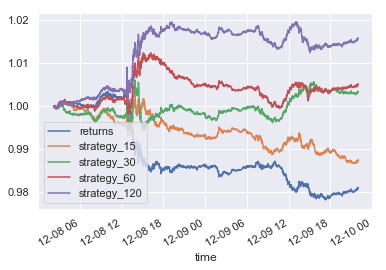

In [4]:
%matplotlib inline
import seaborn as sns; sns.set()  # 18

strats = ['returns']  # 19

for col in cols:  # 20
    strat = 'strategy_%s' % col.split('_')[1]  # 21
    df[strat] = df[col].shift(1) * df['returns']  # 22
    strats.append(strat)  # 23

df[strats].dropna().cumsum().apply(np.exp).plot()  # 24